In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [4]:
data_dir = 'Trace_files'
fnames = [x for x in filter(lambda x: x.endswith('.txt'), os.listdir(os.path.join('.', data_dir)))]
workload_names = [ x for x in map(lambda x: x.split('_')[1].split('.')[0], fnames) ]

In [5]:
# a dict of dataframes, tread (index) lightly..
dataset = {fname.split('_')[1].split('.')[0]:pd.read_csv(os.path.join(data_dir, fname), delimiter='\s+', header = None, dtype = float) for fname in fnames for fname in fnames}

In [7]:
request_sizes = { workname:dataset[workname].iloc[:,2] for workname in workload_names }
for cindx in 4, 5, 6, 7:
    for df in dataset.values():
        df.loc[:,cindx] = df.loc[:,cindx].apply(datetime.fromtimestamp)

In [8]:
turnaround_time = {}
hw_time = {}
for name in workload_names:
    turnaround_time[name] = dataset[name].iloc[:,7] - dataset[name].iloc[:,4]
    turnaround_time[name] = turnaround_time[name].apply(lambda x: x.components.milliseconds*1000+x.components.microseconds)
    hw_time[name] = dataset[name].iloc[:,7] - dataset[name].iloc[:,6]
    hw_time[name] = hw_time[name].apply(lambda x: x.components.milliseconds*1000+x.components.microseconds)

In [24]:
avg_req_size_stdev = {x:np.std(request_sizes[x]) for x in workload_names}
avg_req_size       = {x:np.mean(request_sizes[x]) for x in workload_names}

In [13]:
avg_req_size_stdev

{'Amazon': 234745.85543890402,
 'Booting': 262054.7706461167,
 'FaceBookHandOuts': 19861.436154229323,
 'GoogleMap': 150050.37907137285,
 'Installing': 688548.81359995343,
 'Messaging': 13029.064692472406,
 'Movie': 22138.473942275483,
 'MusicFaceBook': 38740.646723950689,
 'MusicMessage': 28705.430048770344,
 'MusicTwitter': 31888.84811426371,
 'MusicWebBrowse': 46230.516637168643,
 'RadioFaceBook': 39452.570570037838,
 'RadioMessage': 24367.601062691509,
 'RadioWebBrowse': 60136.308226773814,
 'YouTube': 37589.233240289686,
 'angrybird': 111447.80381354027,
 'callIn': 75007.915592740974,
 'callout': 71675.115774002756,
 'cameraVideo': 1164897.7418925371,
 'copyDtoH': 47305.866946469745,
 'copyHtoD': 1940868.7917898432,
 'download': 357550.8613780592,
 'email': 34599.176116814677,
 'facebook': 82773.727945217746,
 'idle': 57664.394805882104,
 'music': 51398.173809922286,
 'radio': 174004.17801400623,
 'twitter': 31459.901878644247,
 'webBrowsing': 52899.379173062342}

In [14]:
import seaborn

## plotting

In [35]:
%matplotlib notebook

<IPython.core.display.Javascript object>


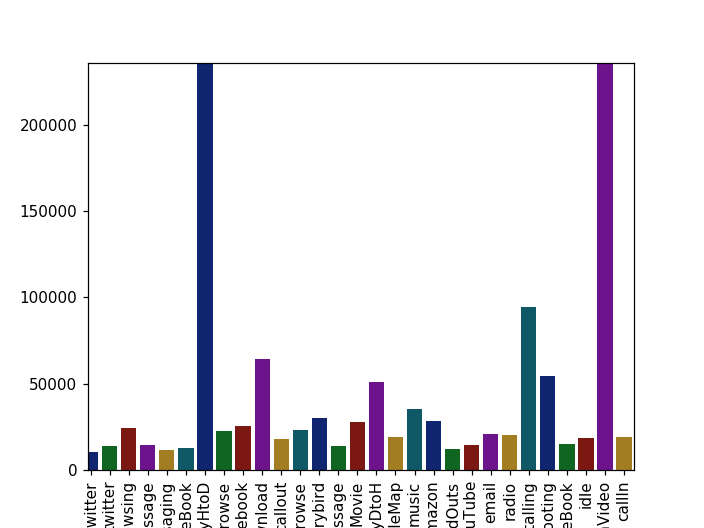

In [42]:
axes = seaborn.barplot(list(avg_req_size.keys()), list(avg_req_size.values()), palette='dark', ci =  "sd", errwidth = 0.5)
for item in axes.get_xticklabels():
    item.set_rotation(90)
axes.set_autoscaley_on
plt.show()

In [31]:
list(avg_req_size.keys())

['MusicTwitter',
 'twitter',
 'webBrowsing',
 'MusicMessage',
 'Messaging',
 'MusicFaceBook',
 'copyHtoD',
 'MusicWebBrowse',
 'facebook',
 'download',
 'callout',
 'RadioWebBrowse',
 'angrybird',
 'RadioMessage',
 'Movie',
 'copyDtoH',
 'GoogleMap',
 'music',
 'Amazon',
 'FaceBookHandOuts',
 'YouTube',
 'email',
 'radio',
 'Installing',
 'Booting',
 'RadioFaceBook',
 'idle',
 'cameraVideo',
 'callIn']

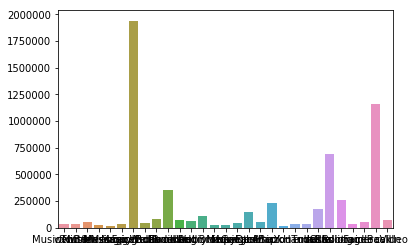